### **State Space**


In [0]:
import copy

class StochasticMazeGridMDP():
    """Class to define our state space and grid maze problem, custizable."""

    def __init__(self, grid_x_size, grid_y_size, pitfall_indices, start_state, goal_state, reward_values, valid_actions, other_states):
      """
      Args:
        reward_values: A tuple of values for the (goal state reward, all other state rewards, pitfall state rewards, other state rewars)
      """

      # Saving the starting, goal state, and valid actions:
      self.start_state = start_state
      self.goal_state = goal_state
      self.actions = valid_actions

      self.grid_x_size = grid_x_size;
      self.grid_y_size = grid_y_size;

      # Building the grid indices (without pitfalls for now)
      self.grid_indices = [(x, y) for x in range(grid_x_size) for y in range(grid_y_size)]
      self.pitfall_indices = pitfall_indices;

      # Building the grid as a dictionary of indices with value being tuple: 
      #   ((either "_" or '\u2588' if pitfall), reward_value for that state)
      self.build_display_grid()

      # Building a grid that contains the state index and immediate reward for each index
      self.build_rewards_grid(reward_values, goal_state)

      if other_states:
        for state in other_states:
          self.state_rewards[state] = reward_values[3]

    def build_display_grid(self):
      """Function to build the grid once the dimensions and pitfall are defined"""
      self.display_grid = {}
      for index in self.grid_indices:
        if (index == self.goal_state):
          self.display_grid[index] = 'B'
        elif (index == self.start_state):
          self.display_grid[index] = 'A'
        elif (index in self.pitfall_indices):
          self.display_grid[index] = '\u2588'
        else:
          self.display_grid[index] = '_'

    def build_rewards_grid(self, reward_values, goal_state):
      self.state_rewards = {}
      for index in self.grid_indices:
        if (index == self.goal_state):
          self.state_rewards[index] = reward_values[0]
        elif (index in self.pitfall_indices):
          self.state_rewards[index] = reward_values[2]
        else:
          self.state_rewards[index] = reward_values[1]


    def print_display_grid(self):
      """Function to display the grid. Not the prettiest, but does its job."""
      for y in range(self.grid_y_size - 1, -1, -1):
          for x in range(self.grid_x_size):
              coordinate = (x, y)
              if (x == self.grid_x_size - 1):
                  print(self.display_grid[coordinate])
              else:
                  print(self.display_grid[coordinate], end = ' ')

    def print_rewards(self):
      """Function to display the grid with the rewards at each index, instead of the caracter. Just gets the job done as well."""
      for y in range(self.grid_y_size - 1, -1, -1):
          for x in range(self.grid_x_size):
              coordinate = (x, y)
              if (x == self.grid_x_size - 1):
                  print("%-3s" % self.state_rewards[coordinate])
              else:
                  print("%-3s" % self.state_rewards[coordinate], end = ' ')


    def is_goal_state(self, state):
      """Function to check if a given state is the goal state."""
      return state == self.goal_state


    def find_valid_actions_and_neighbors(self, state):
      """Function to find valid actions that can be taken from a state, and the neighbors it leads to.
      
      Args:
          state: The current state, (x, y), of which we need to returnvalid neighbors (not pitfall).
          
      Returns:
          neighbors: A list of accessible neighbors from state, this is a lit of (x, y) coordinates.
      """
      transition_map = {'U' : (0, 1), 'L' : (-1, 0), 'R' : (1, 0), 'D' : (0, -1)}

      valid_actions_and_neighbors = {}
      for action in self.actions:
        new_x = state[0] + transition_map[action][0]
        new_y = state[1] + transition_map[action][1]
        if ((0 <= new_x) and (new_x < self.grid_x_size) and 
            (0 <= new_y) and (new_y < self.grid_y_size)):
          # Remember that we are actually allowed to go into the pitfalls, they just have highly negative cost
          valid_actions_and_neighbors[action] = (new_x, new_y)

      return valid_actions_and_neighbors 


    def print_path(self, states):
      """Function to add x's on the grid along the set of states defined by the input.
      Note that we don't check if any of those states are pitfall, it is assumed that the given path is valid.
      
      Args:
          states: A list of states, (x, y), travelled along the grid.
      """
      grid_copy = copy.deepcopy(self)
      
      for state in states:
          grid_copy.grid[state][0] = 'x'
  
      grid_copy.print_grid()

In [0]:
## First grid is the one given for the homework problem ##
print('\n***** Given Grid *****')
pitfall_indices = [(0, 6), (1, 1), (1, 2), (3, 3), (3, 4), (4, 3), (5, 0), (5, 1), (5, 6), (7, 3)]
valid_actions = ['U', 'L', 'R', 'D']

# Building and viewing the grid
grid1 = StochasticMazeGridMDP(8, 7, pitfall_indices, (0, 0), (7, 5), (10, -1, -10), valid_actions, None)
grid1.print_display_grid()
grid1.print_rewards()

# Checking that it returns valid actions correctly:
print(grid1.find_valid_actions_and_neighbors((0, 0))) # ['U', 'R']
print(grid1.find_valid_actions_and_neighbors((7, 0))) # ['U', 'L']
print(grid1.find_valid_actions_and_neighbors((0, 6))) # ['R', 'D']
print(grid1.find_valid_actions_and_neighbors((4, 4))) # ['U', 'L', 'R', 'D']


***** Given Grid *****
█ _ _ _ _ █ _ _
_ _ _ _ _ _ _ B
_ _ _ █ _ _ _ _
_ _ _ █ █ _ _ █
_ █ _ _ _ _ _ _
_ █ _ _ _ █ _ _
A _ _ _ _ █ _ _
-10 -1  -1  -1  -1  -10 -1  -1 
-1  -1  -1  -1  -1  -1  -1  10 
-1  -1  -1  -10 -1  -1  -1  -1 
-1  -1  -1  -10 -10 -1  -1  -10
-1  -10 -1  -1  -1  -1  -1  -1 
-1  -10 -1  -1  -1  -10 -1  -1 
-1  -1  -1  -1  -1  -10 -1  -1 
{'U': (0, 1), 'R': (1, 0)}
{'U': (7, 1), 'L': (6, 0)}
{'R': (1, 6), 'D': (0, 5)}
{'U': (4, 5), 'L': (3, 4), 'R': (5, 4), 'D': (4, 3)}


### Encoding Stochasticity
Note that we do not encode stochasticity as part of our state space class because the way stochasticity can be encoded varies. In the case of this homework assignment, it corresponded to probabilities associated with movement in specific directions, but in general there are many ways you can define non-determinism and I didn't want to spend several hours looking for a generic way when I can do this in 5 mins. Maybe some day I'll come back and fix this.

In [0]:
grid_indices = grid1.grid_indices
arrow_directions = ['N', 'U', 'R', 'U', 'U', 'L', 'N', # First column from bottom to top
                    'R', 'N', 'N', 'L', 'R', 'R', 'D', # Second column from bottom to top
                    'R', 'R', 'U', 'D', 'D', 'R', 'D', # Third column from bottom to top
                    'U', 'U', 'D', 'N', 'N', 'D', 'R', # etc.
                    'L', 'U', 'R', 'N', 'D', 'L', 'U',
                    'N', 'N', 'D', 'R', 'D', 'L', 'N',
                    'U', 'U', 'U', 'R', 'L', 'L', 'U',
                    'L', 'D', 'L', 'N', 'L', 'N', 'D']
grid1_directions = {}
count = 0
for index in grid_indices:
  grid1_directions[index] = arrow_directions[count]
  count += 1

print(grid1_directions)

{(0, 0): 'N', (0, 1): 'U', (0, 2): 'R', (0, 3): 'U', (0, 4): 'U', (0, 5): 'L', (0, 6): 'N', (1, 0): 'R', (1, 1): 'N', (1, 2): 'N', (1, 3): 'L', (1, 4): 'R', (1, 5): 'R', (1, 6): 'D', (2, 0): 'R', (2, 1): 'R', (2, 2): 'U', (2, 3): 'D', (2, 4): 'D', (2, 5): 'R', (2, 6): 'D', (3, 0): 'U', (3, 1): 'U', (3, 2): 'D', (3, 3): 'N', (3, 4): 'N', (3, 5): 'D', (3, 6): 'R', (4, 0): 'L', (4, 1): 'U', (4, 2): 'R', (4, 3): 'N', (4, 4): 'D', (4, 5): 'L', (4, 6): 'U', (5, 0): 'N', (5, 1): 'N', (5, 2): 'D', (5, 3): 'R', (5, 4): 'D', (5, 5): 'L', (5, 6): 'N', (6, 0): 'U', (6, 1): 'U', (6, 2): 'U', (6, 3): 'R', (6, 4): 'L', (6, 5): 'L', (6, 6): 'U', (7, 0): 'L', (7, 1): 'D', (7, 2): 'L', (7, 3): 'N', (7, 4): 'L', (7, 5): 'N', (7, 6): 'D'}


In [0]:
def print_directions(grid, grid_directions):
  """Function to display the grid with the arrows. Not the prettiest, but does its job."""
  for y in range(grid.grid_y_size - 1, -1, -1):
      for x in range(grid.grid_x_size):
          coordinate = (x, y)
          if (x == grid.grid_x_size - 1):
            print_directions_helper(grid, grid_directions, coordinate, False)
          else:
            print_directions_helper(grid, grid_directions, coordinate, True)

def print_directions_helper(grid, grid_directions, coordinate, end_or_not):
  arrow_mapping = {'U': '↑', 'D': '↓', 'L': '←', 'R': '→'}
  if (end_or_not):
    if coordinate == grid.start_state:
      print('A', end = ' ')
    elif coordinate == grid.goal_state:
      print('B', end = ' ')
    elif grid_directions[coordinate] == 'N':
      print('\u2588', end = ' ')
    else:
      print(arrow_mapping[grid_directions[coordinate]], end = ' ')
  else:
    if coordinate == grid.start_state:
      print('A')
    elif coordinate == grid.goal_state:
      print('B')
    elif grid_directions[coordinate] == 'N':
      print('\u2588')
    else:
      print(arrow_mapping[grid_directions[coordinate]])

In [0]:
# CHECKOUT MY PRETTY GRID!!!
print_directions(grid1, grid1_directions)

█ ↓ ↓ → ↑ █ ↑ ↓
← → → ↓ ← ← ← B
↑ → ↓ █ ↓ ↓ ← ←
↑ ← ↓ █ █ → → █
→ █ ↑ ↓ → ↓ ↑ ←
↑ █ → ↑ ↑ █ ↑ ↓
A → → ↑ ← █ ↑ ←


### Transition Function

In [0]:
grid1_action_probabilities = {# Arrow points up:
                              'U' : {'U' : {'U' : 75, 'R' : 10, 'L' : 10, 'D' : 5},
                                    'D' : {'U' : 5, 'R' : 20, 'L' : 20, 'D' : 55},
                                    'L' : {'U' : 20, 'R' : 5, 'L' : 60, 'D' : 15},
                                    'R' : {'U' : 20, 'R' : 60, 'L' : 5, 'D' : 15}},
                              # Arrow points down:
                              'D' : {'U' : {'U' : 55, 'R' : 20, 'L' : 20, 'D' : 5},
                                    'D' : {'U' : 5, 'R' : 10, 'L' : 10, 'D' : 75},
                                    'L' : {'U' : 15, 'R' : 5, 'L' : 60, 'D' : 20},
                                    'R' : {'U' : 15, 'R' : 60, 'L' : 5, 'D' : 20}},
                              # Arrow points left:
                              'L' : {'U' : {'U' : 60, 'R' : 15, 'L' : 20, 'D' : 5},
                                    'D' : {'U' : 5, 'R' : 15, 'L' : 20, 'D' : 60},
                                    'L' : {'U' : 10, 'R' : 5, 'L' : 75, 'D' : 10},
                                    'R' : {'U' : 20, 'R' : 55, 'L' : 5, 'D' : 20}},
                              # Arrow points right:
                              'R' : {'U' : {'U' : 60, 'R' : 20, 'L' : 15, 'D' : 5},
                                    'D' : {'U' : 5, 'R' : 20, 'L' : 15, 'D' : 60},
                                    'L' : {'U' : 20, 'R' : 5, 'L' : 55, 'D' : 20},
                                    'R' : {'U' : 10, 'R' : 75, 'L' : 5, 'D' : 10}},
                              # No Arrow (whatever action the agent takes will work):
                              'N' : {'U' : {'U' : 100, 'R' : 0, 'L' : 0, 'D' : 0},
                                    'D' : {'U' : 0, 'R' : 0, 'L' : 0, 'D' : 100},
                                    'L' : {'U' : 0, 'R' : 0, 'L' : 100, 'D' : 0},
                                    'R' : {'U' : 0, 'R' : 100, 'L' : 0, 'D' : 0}},
                              }

In [0]:
import random
# Testing that the sampling works correctly
curr_arrow = 'U'
action = 'R'
probabilities = grid1_action_probabilities[curr_arrow]
prob_for_action = probabilities[action]

counts = [0, 0, 0, 0]
mapping = {'U' : 0, 'L' : 1, 'R' : 2, 'D' : 3}
for i in range(100):
  actual_transition = random.choice([x for x in prob_for_action for y in range(prob_for_action[x])])
  counts[mapping[actual_transition]] += 1

print(counts)

[21, 4, 57, 18]


### Le **Value Iteration**
Note: This is not as generic as I'd like it to be, ideally you could apply this for any passed in problem, but right now the non-determinism is not part of the state space so it's a tiny bit hacky.

Note2: There is one problem that wasn't actually discussed in any of the classes I took that taught this that I just realized. If you're in a state that doesn't have all 4 neighbors (e.g. a corner), then you have to redistribute the probabilities proportionately, because there's a 0 percent chance that you go to these neighbors, so you have to re-allocate the original intended probability.


####(a)
Implement the value iteration for this world using a discount factor of $\gamma$ = 0.95

In [0]:
def value_iteration(mdp, gamma, eps):
  """Run value iteration on the given Markoc Decision Problem."""
  
  # First, we recreate an instance of the state space so we can assign an initial utility to each state
  curr_utilities = mdp.state_rewards.copy()
  
  # Minimum allowable utility change (if the max utility change at an iteration is smaller, we stop)
  min_change = eps * (1 - gamma) / gamma

  # Maximum utility change this iteration:
  delta = min_change + 1

  num_iterations = 0

  while delta >= min_change:
    num_iterations += 1    
    
    print("Iteration:", num_iterations, "<===>",  "\u03B4: %.3f" % delta)
    print_utilities(mdp, curr_utilities)

    new_utilities = curr_utilities.copy()
    biggest_current_change = 0
    for state in curr_utilities:
      # We DO NOT update the utilities of pitfall and goal states
      if (state not in mdp.pitfall_indices) and (state != mdp.goal_state):
        # The stochastic bias for the current state
        arrow_direction = grid1_directions[state]

        # The probabilities of going to each neighboring state for every action
        transition_probabilities_for_actions = grid1_action_probabilities[arrow_direction]

        # The valid actions you can take from this state, and the neighbors they lead you to
        valid_actions_and_neighbors = mdp.find_valid_actions_and_neighbors(state)

        # Computing the expected rewards for each action
        action_value_sums = {}
        for action in valid_actions_and_neighbors:
          action_value_sums[action] = 0
  
        for action in valid_actions_and_neighbors:
          # The probabilities of getting to each neighboring state given the stochastic bias and action:
          transition_probabilities = transition_probabilities_for_actions[action]

          # We need to iterate through every state this action can get us to (we do so by iterating through the action, which points to wanted state)
          sum_over_neighbors = 0
          for neighbor_direction in valid_actions_and_neighbors:
            # The probability of getting to the neighboring state we want to get to, P(s' | s, a):
            wanted_trans_prob = transition_probabilities[neighbor_direction] # Note that the action points to the neighboring state we want
            
            # The current utility of that neighbor
            neighbor_utility = curr_utilities[valid_actions_and_neighbors[neighbor_direction]]

            sum_over_neighbors += (wanted_trans_prob / 100) * neighbor_utility

          action_value_sums[action] = sum_over_neighbors

        # Updating the utility of the current state under consideration:
        new_utilities[state] = mdp.state_rewards[state] + gamma * max(action_value_sums.values())

        # Is there (and what is) the new biggest utility change:
        if (abs(new_utilities[state] - curr_utilities[state]) > biggest_current_change):
          biggest_current_change = abs(new_utilities[state] - curr_utilities[state])

    delta = biggest_current_change

    curr_utilities = new_utilities

  return curr_utilities  

def print_utilities(mdp, utilities):
  """Function to display the grid with the rewards at each index, instead of the caracter. Just gets the job done as well."""
  for y in range(mdp.grid_y_size - 1, -1, -1):
      for x in range(mdp.grid_x_size):
          coordinate = (x, y)
          if (x == mdp.grid_x_size - 1):
              print("%10.2f" % utilities[coordinate])
          else:
              print("%10.2f" % utilities[coordinate], end = ' ')

In [0]:
final_utilities = value_iteration(grid1, 0.95, 0.1)

Iteration: 1 <===> δ: 1.005
    -10.00      -1.00      -1.00      -1.00      -1.00     -10.00      -1.00      -1.00
     -1.00      -1.00      -1.00      -1.00      -1.00      -1.00      -1.00      10.00
     -1.00      -1.00      -1.00     -10.00      -1.00      -1.00      -1.00      -1.00
     -1.00      -1.00      -1.00     -10.00     -10.00      -1.00      -1.00     -10.00
     -1.00     -10.00      -1.00      -1.00      -1.00      -1.00      -1.00      -1.00
     -1.00     -10.00      -1.00      -1.00      -1.00     -10.00      -1.00      -1.00
     -1.00      -1.00      -1.00      -1.00      -1.00     -10.00      -1.00      -1.00
Iteration: 2 <===> δ: 7.030
    -10.00      -2.23      -1.81      -1.76      -2.19     -10.00      -2.19       6.03
     -2.19      -1.95      -1.95      -2.38      -1.95      -2.38       3.80      10.00
     -1.76      -1.95      -2.38     -10.00      -4.09      -1.95      -1.95       4.03
     -1.76      -2.38      -2.38     -10.00     -10.00      -2.3

In [0]:
# TODO: There's a big chunk of this which is just recalculating the sum_s'(P(s'|s, a)U'(s)), which I computed in VI.
#       Should abstract that to a separate function instead of repeating it like a noob.

def find_optimal_actions(mdp, final_utilities):

  # Copying the grid, we will replace the utilities with the intended action
  policies = final_utilities.copy()

  for state in policies:
    # Getting stochastic bias
    arrow_direction = grid1_directions[state]

    # The probabilities of going to each neighboring state for every action
    transition_probabilities_for_actions = grid1_action_probabilities[arrow_direction]  # TODO: Generalize this part

    # Getting the valid actions we can take from that state and the neighboring states they lead to
    valid_actions_and_neighbors = mdp.find_valid_actions_and_neighbors(state)

    # Computing the expected rewards for each action
    action_value_sums = {}
    for action in valid_actions_and_neighbors:
      action_value_sums[action] = 0

    for action in valid_actions_and_neighbors:
      # The probabilities of getting to each neighboring state given the stochastic bias and action:
      transition_probabilities = transition_probabilities_for_actions[action]

      # We need to iterate through every state this action can get us to (we do so by iterating through the action, which points to wanted state)
      sum_over_neighbors = 0
      for neighbor_direction in valid_actions_and_neighbors:
        # The probability of getting to the neighboring state we want to get to, P(s' | s, a):
        wanted_trans_prob = transition_probabilities[neighbor_direction] # Note that the action points to the neighboring state we want
        
        # The current utility of that neighbor
        neighbor_utility = final_utilities[valid_actions_and_neighbors[neighbor_direction]]
        sum_over_neighbors += (wanted_trans_prob / 100) * neighbor_utility

      action_value_sums[action] = sum_over_neighbors

    best_action = max(action_value_sums, key=action_value_sums.get)

    policies[state] = best_action

  return policies


In [0]:
optimal_policies = find_optimal_actions(grid1, final_utilities)
print_directions(grid1, optimal_policies)

↓ → → ← ← → → ↓
↓ ↑ ↑ → → → → B
↓ ← ↑ → → → ↑ ↑
↑ ← ← ↓ → ↑ ↑ ↑
↑ ← → → → ↑ ↑ ↓
↑ ↓ ↓ ↓ ↑ ↑ ↑ ↑
A → ← ← ← → → ↑


####(b)
Repeat the previous problem when the reward for the cells at locations (4, 3), (1, 5) and (2, 5) have the following values a) $r(s) = 0$; b) $r(s) = 100$; c) $r(s) = 03$. Show the policy for each case. Explain intuitively why these values lead to each resulting policy.

In [0]:
pitfall_indices = [(0, 6), (1, 1), (1, 2), (3, 3), (3, 4), (4, 3), (5, 0), (5, 1), (5, 6), (7, 3)]
valid_actions = ['U', 'L', 'R', 'D']

# Building and viewing the grid a)
other_states = [(2, 3), (4, 5), (4, 6)]
grida = StochasticMazeGridMDP(8, 7, pitfall_indices, (0, 0), (7, 5), (10, -1, -10, 0), valid_actions, other_states)
grida.print_display_grid()
grida.print_rewards()

# Building and viewing the grid b)
other_states = [(2, 3), (4, 5), (4, 6)]
gridb = StochasticMazeGridMDP(8, 7, pitfall_indices, (0, 0), (7, 5), (10, -1, -10, 100), valid_actions, other_states)
gridb.print_display_grid()
gridb.print_rewards()

# Building and viewing the grid c)
other_states = [(2, 3), (4, 5), (4, 6)]
gridc = StochasticMazeGridMDP(8, 7, pitfall_indices, (0, 0), (7, 5), (10, -1, -10, -3), valid_actions, other_states)
gridc.print_display_grid()
gridc.print_rewards()

█ _ _ _ _ █ _ _
_ _ _ _ _ _ _ B
_ _ _ █ _ _ _ _
_ _ _ █ █ _ _ █
_ █ _ _ _ _ _ _
_ █ _ _ _ █ _ _
A _ _ _ _ █ _ _
-10 -1  -1  -1  0   -10 -1  -1 
-1  -1  -1  -1  0   -1  -1  10 
-1  -1  -1  -10 -1  -1  -1  -1 
-1  -1  0   -10 -10 -1  -1  -10
-1  -10 -1  -1  -1  -1  -1  -1 
-1  -10 -1  -1  -1  -10 -1  -1 
-1  -1  -1  -1  -1  -10 -1  -1 
█ _ _ _ _ █ _ _
_ _ _ _ _ _ _ B
_ _ _ █ _ _ _ _
_ _ _ █ █ _ _ █
_ █ _ _ _ _ _ _
_ █ _ _ _ █ _ _
A _ _ _ _ █ _ _
-10 -1  -1  -1  100 -10 -1  -1 
-1  -1  -1  -1  100 -1  -1  10 
-1  -1  -1  -10 -1  -1  -1  -1 
-1  -1  100 -10 -10 -1  -1  -10
-1  -10 -1  -1  -1  -1  -1  -1 
-1  -10 -1  -1  -1  -10 -1  -1 
-1  -1  -1  -1  -1  -10 -1  -1 
█ _ _ _ _ █ _ _
_ _ _ _ _ _ _ B
_ _ _ █ _ _ _ _
_ _ _ █ █ _ _ █
_ █ _ _ _ _ _ _
_ █ _ _ _ █ _ _
A _ _ _ _ █ _ _
-10 -1  -1  -1  -3  -10 -1  -1 
-1  -1  -1  -1  -3  -1  -1  10 
-1  -1  -1  -10 -1  -1  -1  -1 
-1  -1  -3  -10 -10 -1  -1  -10
-1  -10 -1  -1  -1  -1  -1  -1 
-1  -10 -1  -1  -1  -10 -1  -1 
-1  -1  -1  -1  -1  -10 

In [0]:
final_utilitiesa = value_iteration(grida, 0.95, 0.1)
optimal_policiesa = find_optimal_actions(grida, final_utilitiesa)
print_directions(grida, optimal_policiesa)

Iteration: 1 <===> δ: 1.005
    -10.00      -1.00      -1.00      -1.00       0.00     -10.00      -1.00      -1.00
     -1.00      -1.00      -1.00      -1.00       0.00      -1.00      -1.00      10.00
     -1.00      -1.00      -1.00     -10.00      -1.00      -1.00      -1.00      -1.00
     -1.00      -1.00       0.00     -10.00     -10.00      -1.00      -1.00     -10.00
     -1.00     -10.00      -1.00      -1.00      -1.00      -1.00      -1.00      -1.00
     -1.00     -10.00      -1.00      -1.00      -1.00     -10.00      -1.00      -1.00
     -1.00      -1.00      -1.00      -1.00      -1.00     -10.00      -1.00      -1.00
Iteration: 2 <===> δ: 7.030
    -10.00      -2.23      -1.81      -1.14      -1.04     -10.00      -2.19       6.03
     -2.19      -1.95      -1.95      -2.19      -0.38      -2.09       3.80      10.00
     -1.76      -1.95      -2.09     -10.00      -3.56      -1.95      -1.95       4.03
     -1.76      -2.23      -1.38     -10.00     -10.00      -2.3

In [0]:
final_utilitiesb = value_iteration(gridb, 0.95, 0.1)
optimal_policiesb = find_optimal_actions(gridb, final_utilitiesb)
print_directions(gridb, optimal_policiesb)

Iteration: 1 <===> δ: 1.005
    -10.00      -1.00      -1.00      -1.00     100.00     -10.00      -1.00      -1.00
     -1.00      -1.00      -1.00      -1.00     100.00      -1.00      -1.00      10.00
     -1.00      -1.00      -1.00     -10.00      -1.00      -1.00      -1.00      -1.00
     -1.00      -1.00     100.00     -10.00     -10.00      -1.00      -1.00     -10.00
     -1.00     -10.00      -1.00      -1.00      -1.00      -1.00      -1.00      -1.00
     -1.00     -10.00      -1.00      -1.00      -1.00     -10.00      -1.00      -1.00
     -1.00      -1.00      -1.00      -1.00      -1.00     -10.00      -1.00      -1.00
Iteration: 2 <===> δ: 71.108
    -10.00      -2.23      -1.81      70.11     150.16     -10.00      -2.19       6.03
     -2.19      -1.95      -1.95      53.91     156.62      69.16       3.80      10.00
     -1.76      -1.95      69.16     -10.00      48.69      -1.95      -1.95       4.03
     -1.76      49.11      98.62     -10.00     -10.00      -2.

In [0]:
final_utilitiesc = value_iteration(gridc, 0.95, 0.1)
optimal_policiesc = find_optimal_actions(gridc, final_utilitiesc)
print_directions(gridc, optimal_policiesc)

Iteration: 1 <===> δ: 1.005
    -10.00      -1.00      -1.00      -1.00      -3.00     -10.00      -1.00      -1.00
     -1.00      -1.00      -1.00      -1.00      -3.00      -1.00      -1.00      10.00
     -1.00      -1.00      -1.00     -10.00      -1.00      -1.00      -1.00      -1.00
     -1.00      -1.00      -3.00     -10.00     -10.00      -1.00      -1.00     -10.00
     -1.00     -10.00      -1.00      -1.00      -1.00      -1.00      -1.00      -1.00
     -1.00     -10.00      -1.00      -1.00      -1.00     -10.00      -1.00      -1.00
     -1.00      -1.00      -1.00      -1.00      -1.00     -10.00      -1.00      -1.00
Iteration: 2 <===> δ: 7.030
    -10.00      -2.23      -1.81      -1.85      -4.47     -10.00      -2.19       6.03
     -2.19      -1.95      -1.95      -2.76      -4.04      -2.76       3.80      10.00
     -1.76      -1.95      -2.76     -10.00      -4.37      -1.95      -1.95       4.03
     -1.76      -2.66      -4.38     -10.00     -10.00      -2.3

####(c)
Run 50 instances of your computed policy and record the number of times the agent managed to reach the goal state, along with the accumulated reward for each instance. Compare the results and briefly explain if what you observe is what you expected.

In [0]:
def action_result(grid, grid_directions, action_probabilities, curr_state, action):
    """Given that you are in curr_state and want to take action, this function returns the state you actually end up in.
    """
    # For the state you are currently in, this represents the probabilities of transitioning to each neigboring state (for every possible action):
    probabilities = action_probabilities[grid_directions[curr_state]]

    # For the action you want to take, given your current state, this represents the probabilities you transfer to each neighboring:
    prob_for_action = probabilities[action]

    # This is the transition you actually end up making
    actual_transition = random.choice([x for x in prob_for_action for y in range(prob_for_action[x])])

    # Transition mappings:
    transition_map = {'U' : (0, 1), 'L' : (-1, 0), 'R' : (1, 0), 'D' : (0, -1)}
    actual_transition_arr = transition_map[actual_transition]
    new_state = (curr_state[0] + actual_transition_arr[0], curr_state[1] + actual_transition_arr[1])

    # We have to check that this transition actually leaves you on the grid
    # NOTE (TODO): Instead of looping until we have a valid one, it is better to just remove the states we can't get to from the sampling set.
    while new_state not in grid.grid_indices:
      # Pick a new transition
      actual_transition = random.choice([x for x in prob_for_action for y in range(prob_for_action[x])])

      # Get the new state from that transition
      actual_transition_arr = transition_map[actual_transition]
      new_state = (curr_state[0] + actual_transition_arr[0], curr_state[1] + actual_transition_arr[1])
    
    return new_state

In [0]:
# Testing that we are correctly moving arround, accounting for probabilities
curr_state = (4, 1)
action = 'D'

new_states = {}
for x in range(100):
  new_state = action_result(grid1, grid1_directions, grid1_action_probabilities, curr_state, action)

  if new_state not in new_states:
    new_states[new_state] = 1
  else:
    new_states[new_state] += 1

print(new_states) # Seems to work fine, mess around with different curr_states and actions to see

{(4, 2): 4, (3, 1): 23, (5, 1): 28, (4, 0): 45}


In [0]:
print_directions(grid1, optimal_policies)

↓ → → ← ← → → ↓
↓ ↑ ↑ → → → → B
↓ ← ↑ → → → ↑ ↑
↑ ← ← ↓ → ↑ ↑ ↑
↑ ← → → → ↑ ↑ ↓
↑ ↓ ↓ ↓ ↑ ↑ ↑ ↑
A → ← ← ← → → ↑


In [0]:
def run_agent(mdp, optimal_policies):
  """Function to run an agent across the given MDP using the given policy."""
  curr_state = mdp.start_state

  # Needed to transition between states:
  transition_map = {'U' : (0, 1), 'L' : (-1, 0), 'R' : (1, 0), 'D' : (0, -1)}

  # We give the agent up to "count" steps to try to reach the goal.
  count = 12
  total_reward = 0
  path = []
  while count > 0:
    count -= 1
    path.append(curr_state)

    # Adding the current reward to our total rewards
    total_reward += mdp.state_rewards[curr_state]

    # Current action our policy dictates
    action = optimal_policies[curr_state]

    # We attempt to apply this action (the non-determinism in our system means this doens't always happen)
    new_state = action_result(mdp, grid1_directions, grid1_action_probabilities, curr_state, action)

    if (new_state == mdp.goal_state):
      return (total_reward, path, True)
    
    curr_state = new_state

  return (total_reward, path, False)

In [0]:
result = run_agent(grid1, optimal_policies)

reach_goal_count = 0
reach_goal_path_and_reward = []
for _ in range(50):
  result = run_agent(grid1, optimal_policies)
  if result[2]:
    reach_goal_count += 1

  reach_goal_path_and_reward.append(result)

0


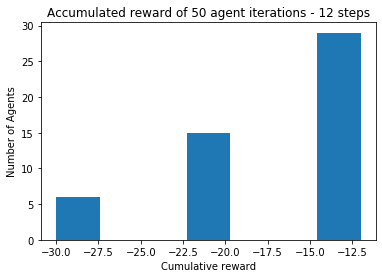

Text(0, 0.5, 'Number of successful Agents')

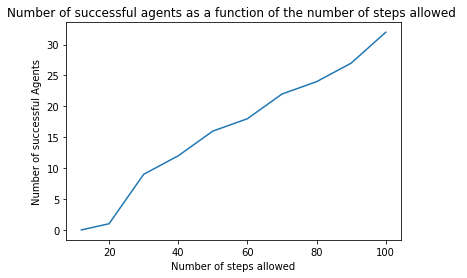

In [0]:
import matplotlib.pyplot as plt
import numpy as np

print(reach_goal_count)
accumulated_rewards = [x[0] for x in reach_goal_path_and_reward]

# Plotting rewards
plt.hist(accumulated_rewards, bins='auto')
plt.title("Accumulated reward of 50 agent iterations - 12 steps")
plt.xlabel('Cumulative reward')
plt.ylabel('Number of Agents')
plt.show()

plt.plot([12, 20, 30, 40, 50, 60, 70, 80, 90, 100], [0, 1, 9, 12, 16, 18, 22, 24, 27, 32])
plt.title("Number of successful agents as a function of the number of steps allowed ")
plt.xlabel('Number of steps allowed')
plt.ylabel('Number of successful Agents')

### Le **Policy Iteration**

#### (a)
Implement the polict iteration for this world using a discount factor of $\gamma$ = 0.95

In [0]:
def policy_evaluation(mdp, curr_policy, curr_utilities, gamma):
  new_utilities = curr_utilities.copy()

  for state in curr_utilities:
    if (state not in mdp.pitfall_indices) and (state != mdp.goal_state):
      # The stochastic bias for the current state
      arrow_direction = grid1_directions[state]

      # The probabilities of going to each neighboring state for every action
      transition_probabilities_for_actions = grid1_action_probabilities[arrow_direction]

      # The valid actions you can take from this state, and the neighbors they lead you to
      valid_actions_and_neighbors = mdp.find_valid_actions_and_neighbors(state)

      # The action that our current policy dictates for this state, pi(s)
      action = curr_policy[state]

      transition_probabilities = transition_probabilities_for_actions[action]
      curr_sum = 0
      for neighbor_direction in valid_actions_and_neighbors:  
        wanted_trans_prob = transition_probabilities[neighbor_direction]
        neighbor_utility = curr_utilities[valid_actions_and_neighbors[neighbor_direction]]
        curr_sum += (wanted_trans_prob / 100) * neighbor_utility

      new_utilities[state] = mdp.state_rewards[state] + gamma * curr_sum

  return new_utilities

In [0]:
def policy_iteration(mdp, gamma, eps):
  """Run policy iteration on the given Markov Decision Problem."""
  
  # First, we recreate an instance of the state space so we can assign an initial policy to each state
  curr_policy = mdp.state_rewards.copy()
  curr_utilities = mdp.state_rewards.copy()

  # We assign the same initial policy for all states: 'U'
  for state in curr_policy:
    curr_policy[state] = 'U'

  # Have any of the policies changed this iteration?
  changed = True

  num_iterations = 0
  num_policies_changed = 0
  while changed and num_iterations < 100:
    num_iterations += 1  
    changed = False

    curr_utilities = policy_evaluation(mdp, curr_policy, curr_utilities, gamma)

    print("Iteration:", num_iterations, "Number of Policies changed:", num_policies_changed)
    print_directions(mdp, curr_policy)
    print_utilities(mdp, curr_utilities)

    new_policy = curr_policy.copy()

    num_policies_changed = 0
    for state in curr_policy:
      ## First summation ##
      # The stochastic bias for the current state
      arrow_direction = grid1_directions[state]

      # The probabilities of going to each neighboring state for every action
      transition_probabilities_for_actions = grid1_action_probabilities[arrow_direction]

      # The valid actions you can take from this state, and the neighbors they lead you to
      valid_actions_and_neighbors = mdp.find_valid_actions_and_neighbors(state)

      # Computing the expected rewards for each action
      action_value_sums = {}
      for action in valid_actions_and_neighbors:
        action_value_sums[action] = 0

      for action in valid_actions_and_neighbors:
        # The probabilities of getting to each neighboring state given the stochastic bias and action:
        transition_probabilities = transition_probabilities_for_actions[action]

        # We need to iterate through every state this action can get us to (we do so by iterating through the action, which points to wanted state)
        sum_over_neighbors = 0
        for neighbor_direction in valid_actions_and_neighbors:
          # The probability of getting to the neighboring state we want to get to, P(s' | s, a):
          wanted_trans_prob = transition_probabilities[neighbor_direction] # Note that the action points to the neighboring state we want
          
          # The current utility of that neighbor
          neighbor_utility = curr_utilities[valid_actions_and_neighbors[neighbor_direction]]

          sum_over_neighbors += (wanted_trans_prob / 100) * neighbor_utility

        action_value_sums[action] = sum_over_neighbors

        to_remove = []
        for action in action_value_sums:
          if action_value_sums[action] == 0:
            to_remove.append(action)

        for action in to_remove:
            del action_value_sums[action]

        # Maximum sum
        max_sum = max(action_value_sums.values())


        ## Second Sumation ##
        policy_sum = 0
        action = curr_policy[state]
        transition_probabilities = transition_probabilities_for_actions[action]
        for neighbor_direction in valid_actions_and_neighbors:  
          wanted_trans_prob = transition_probabilities[neighbor_direction]
          neighbor_utility = curr_utilities[valid_actions_and_neighbors[neighbor_direction]]
          policy_sum += (wanted_trans_prob / 100) * neighbor_utility

        if (max_sum > policy_sum):
          best_action = max(action_value_sums, key=action_value_sums.get)
          new_policy[state] = best_action
          changed = True
          num_policies_changed += 1


    curr_policy = new_policy

  return curr_policy

In [0]:
final_policy = policy_iteration(grid1, 0.95, 0.1)
print_directions(grid1, final_policy)

Iteration: 1 Number of Policies changed: 0
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ B
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
A ↑ ↑ ↑ ↑ ↑ ↑ ↑
    -10.00      -3.14      -1.43      -1.38      -2.09     -10.00      -2.09      -0.72
     -6.89      -1.95      -1.95      -2.38      -1.95      -7.08      -0.38      10.00
     -1.85      -1.95      -3.66     -10.00      -4.09      -1.95      -1.95       4.03
     -1.85      -2.38      -3.66     -10.00     -10.00      -3.23      -3.66     -10.00
     -3.52     -10.00      -2.80      -6.65      -7.08      -2.38      -1.95      -6.94
     -2.71     -10.00      -3.23      -1.95      -2.80     -10.00      -2.80      -1.76
     -1.95      -7.03      -1.90      -1.90      -3.18     -10.00      -2.76      -1.76
Iteration: 2 Number of Policies changed: 83
↑ → ↑ ↑ ↑ ↑ → ↓
↓ → ↑ ↑ ← ↓ → B
↓ ← ← ↑ ↑ → → ↑
↑ ↑ ← ← → ↑ ← ↑
↑ ↑ ↑ ↓ → → ← ↓
↓ ← → ↓ ← ↑ → ↓
A → → ← ← → → ↑
    -10.00      -2.66      -1.95      -1.71      -2.17     -10.00      -1

#### (b) 
Repeat the previous problem when the reward for the cells at locations (4, 3), (1, 5) and (2, 5) have the following values a) $r(s) = 0$; b) $r(s) = 100$; c) $r(s) = 03$. Show the policy for each case. Explain intuitively why these values lead to each resulting policy.

In [0]:
pitfall_indices = [(0, 6), (1, 1), (1, 2), (3, 3), (3, 4), (4, 3), (5, 0), (5, 1), (5, 6), (7, 3)]
valid_actions = ['U', 'L', 'R', 'D']

# Building and viewing the grid a)
other_states = [(2, 3), (4, 5), (4, 6)]
grida = StochasticMazeGridMDP(8, 7, pitfall_indices, (0, 0), (7, 5), (10, -1, -10, 0), valid_actions, other_states)
grida.print_display_grid()
grida.print_rewards()

# Building and viewing the grid b)
other_states = [(2, 3), (4, 5), (4, 6)]
gridb = StochasticMazeGridMDP(8, 7, pitfall_indices, (0, 0), (7, 5), (10, -1, -10, 100), valid_actions, other_states)
gridb.print_display_grid()
gridb.print_rewards()

# Building and viewing the grid c)
other_states = [(2, 3), (4, 5), (4, 6)]
gridc = StochasticMazeGridMDP(8, 7, pitfall_indices, (0, 0), (7, 5), (10, -1, -10, -3), valid_actions, other_states)
gridc.print_display_grid()
gridc.print_rewards()

█ _ _ _ _ █ _ _
_ _ _ _ _ _ _ B
_ _ _ █ _ _ _ _
_ _ _ █ █ _ _ █
_ █ _ _ _ _ _ _
_ █ _ _ _ █ _ _
A _ _ _ _ █ _ _
-10 -1  -1  -1  0   -10 -1  -1 
-1  -1  -1  -1  0   -1  -1  10 
-1  -1  -1  -10 -1  -1  -1  -1 
-1  -1  0   -10 -10 -1  -1  -10
-1  -10 -1  -1  -1  -1  -1  -1 
-1  -10 -1  -1  -1  -10 -1  -1 
-1  -1  -1  -1  -1  -10 -1  -1 
█ _ _ _ _ █ _ _
_ _ _ _ _ _ _ B
_ _ _ █ _ _ _ _
_ _ _ █ █ _ _ █
_ █ _ _ _ _ _ _
_ █ _ _ _ █ _ _
A _ _ _ _ █ _ _
-10 -1  -1  -1  100 -10 -1  -1 
-1  -1  -1  -1  100 -1  -1  10 
-1  -1  -1  -10 -1  -1  -1  -1 
-1  -1  100 -10 -10 -1  -1  -10
-1  -10 -1  -1  -1  -1  -1  -1 
-1  -10 -1  -1  -1  -10 -1  -1 
-1  -1  -1  -1  -1  -10 -1  -1 
█ _ _ _ _ █ _ _
_ _ _ _ _ _ _ B
_ _ _ █ _ _ _ _
_ _ _ █ █ _ _ █
_ █ _ _ _ _ _ _
_ █ _ _ _ █ _ _
A _ _ _ _ █ _ _
-10 -1  -1  -1  -3  -10 -1  -1 
-1  -1  -1  -1  -3  -1  -1  10 
-1  -1  -1  -10 -1  -1  -1  -1 
-1  -1  -3  -10 -10 -1  -1  -10
-1  -10 -1  -1  -1  -1  -1  -1 
-1  -10 -1  -1  -1  -10 -1  -1 
-1  -1  -1  -1  -1  -10 

In [0]:
final_policya = policy_iteration(grida, 0.95, 0.1)
print_directions(grida, final_policya)

Iteration: 1
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ B
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
A ↑ ↑ ↑ ↑ ↑ ↑ ↑
    -10.00      -3.14      -1.43      -1.19      -1.04     -10.00      -2.09      -0.72
     -6.89      -1.95      -1.95      -2.19      -0.38      -6.89      -0.38      10.00
     -1.85      -1.95      -3.61     -10.00      -3.56      -1.95      -1.95       4.03
     -1.85      -2.23      -2.66     -10.00     -10.00      -3.23      -3.66     -10.00
     -3.52     -10.00      -2.09      -6.65      -7.08      -2.38      -1.95      -6.94
     -2.71     -10.00      -3.23      -1.95      -2.80     -10.00      -2.80      -1.76
     -1.95      -7.03      -1.90      -1.90      -3.18     -10.00      -2.76      -1.76
NUM CHANGED:  82
Iteration: 2
↑ → ↑ ↑ ↑ ↑ → ↓
↓ → ↑ ↑ ↑ ← → B
↓ ← ← ↑ ↑ → → ↑
↑ ↑ ← ← → ↑ ← ↑
↑ → ↑ ↓ → → ← ↓
↓ ← → ↓ ← ↑ → ↓
A → → ← ← → → ↑
    -10.00      -2.66      -1.91      -1.51      -1.08     -10.00      -1.94       5.93
     -2.81      -3.20      -2

In [0]:
final_policyb = policy_iteration(gridb, 0.95, 0.1)
print_directions(gridb, final_policyb)

Iteration: 1
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ B
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
A ↑ ↑ ↑ ↑ ↑ ↑ ↑
    -10.00      -3.14      -1.43      17.81     103.70     -10.00      -2.09      -0.72
     -6.89      -1.95      -1.95      16.81     156.62      12.11      -0.38      10.00
     -1.85      -1.95       1.14     -10.00      48.69      -1.95      -1.95       4.03
     -1.85      12.01      97.34     -10.00     -10.00      -3.23      -3.66     -10.00
     -3.52     -10.00      69.16      -6.65      -7.08      -2.38      -1.95      -6.94
     -2.71     -10.00      -3.23      -1.95      -2.80     -10.00      -2.80      -1.76
     -1.95      -7.03      -1.90      -1.90      -3.18     -10.00      -2.76      -1.76
NUM CHANGED:  99
Iteration: 2
↑ → → → ↓ ← → ↓
↓ → → → ↑ ← ← B
↓ ↓ ↓ → ↑ ← → ↑
→ → ↓ ← ↑ ↑ ← ↑
↑ → ↑ ← → → ← ↓
↓ ← ↑ ↓ ← ↑ → ↓
A → → ← ← → → ↑
    -10.00      -2.66       8.63      74.42     183.32     -10.00      -1.94       5.93
     -2.81      -3.20      10

In [0]:
final_policyc = policy_iteration(gridc, 0.95, 0.1)
print_directions(gridc, final_policyc)

Iteration: 1
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ B
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑
A ↑ ↑ ↑ ↑ ↑ ↑ ↑
    -10.00      -3.14      -1.43      -1.76      -4.19     -10.00      -2.09      -0.72
     -6.89      -1.95      -1.95      -2.76      -5.09      -7.46      -0.38      10.00
     -1.85      -1.95      -3.75     -10.00      -5.13      -1.95      -1.95       4.03
     -1.85      -2.66      -5.66     -10.00     -10.00      -3.23      -3.66     -10.00
     -3.52     -10.00      -4.23      -6.65      -7.08      -2.38      -1.95      -6.94
     -2.71     -10.00      -3.23      -1.95      -2.80     -10.00      -2.80      -1.76
     -1.95      -7.03      -1.90      -1.90      -3.18     -10.00      -2.76      -1.76
NUM CHANGED:  89
Iteration: 2
↑ → ↑ ↑ ↑ ↑ → ↓
↓ → ↑ ↑ ← ↓ → B
↓ ← ← ↑ → → → ↑
↑ ← ← ← → ↑ ← ↑
↑ ↑ ↓ ↓ → → ← ↓
↓ ← → ↓ ← ↑ → ↓
A → → ← ← → → ↑
    -10.00      -2.66      -2.02      -2.13      -4.36     -10.00      -1.94       5.93
     -2.81      -3.20      -2

####(c) 
Run 50 instances of your computed policy and record the number of times the agent managed to reach the goal state, along with the accumulated reward for each instance. Compare the results and briefly explain if what you observe is what you expected.

In [0]:
def run_agent(mdp, optimal_policies):
  """Function to run an agent across the given MDP using the given policy."""
  curr_state = mdp.start_state

  # Needed to transition between states:
  transition_map = {'U' : (0, 1), 'L' : (-1, 0), 'R' : (1, 0), 'D' : (0, -1)}

  # We give the agent up to "count" steps to try to reach the goal.
  count = 100
  total_reward = 0
  path = []
  while count > 0:
    count -= 1
    path.append(curr_state)

    # Adding the current reward to our total rewards
    total_reward += mdp.state_rewards[curr_state]

    # Current action our policy dictates
    action = optimal_policies[curr_state]

    # We attempt to apply this action (the non-determinism in our system means this doens't always happen)
    new_state = action_result(mdp, grid1_directions, grid1_action_probabilities, curr_state, action)

    if (new_state == mdp.goal_state):
      return (total_reward, path, True)
    
    curr_state = new_state

  return (total_reward, path, False)

In [0]:
reach_goal_count = 0
reach_goal_path_and_reward = []
for _ in range(50):
  result = run_agent(grid1, final_policy)
  if result[2]:
    reach_goal_count += 1

  reach_goal_path_and_reward.append(result)

10


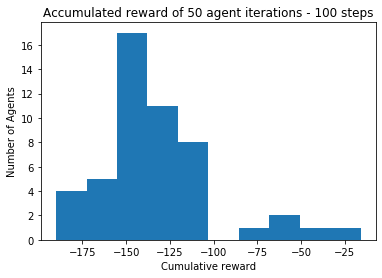

Text(0, 0.5, 'Number of successful Agents')

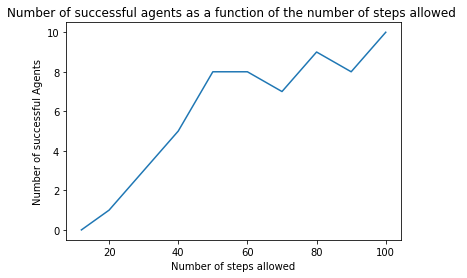

In [172]:
import matplotlib.pyplot as plt
import numpy as np

print(reach_goal_count)
accumulated_rewards = [x[0] for x in reach_goal_path_and_reward]

# Plotting rewards
plt.hist(accumulated_rewards, bins='auto')
plt.title("Accumulated reward of 50 agent iterations - 100 steps")
plt.xlabel('Cumulative reward')
plt.ylabel('Number of Agents')
plt.show()

plt.plot([12, 20, 30, 40, 50, 60, 70, 80, 90, 100], [0, 1, 3, 5, 8, 8, 7, 9, 8, 10])
plt.title("Number of successful agents as a function of the number of steps allowed ")
plt.xlabel('Number of steps allowed')
plt.ylabel('Number of successful Agents')